In [1]:
print('こんにちは')

こんにちは


In [2]:
from sympy import *
init_printing()
from sympy.stats import *

# lemma1の設定

In [3]:
a = Symbol('a') 
s = Symbol('s') 
gamma = Symbol('gamma') 

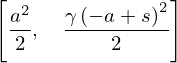

In [4]:
k = Lambda([a], Rational(1,2) * (a ** 2))
ks = Lambda([a,s], Rational(1,2) * gamma * (s-a) ** 2)
[k(a), ks(a,s)]

In [5]:
m = Symbol('m') 
sigma = Symbol('sigma', positive = True) 
eps = Normal('varepsilon', 0, sigma)
y = m*a + eps
b = Symbol('b')
x = b * a
[y , E(y), x]

In [6]:
f = Symbol('f')
v = Symbol('v')
w = f + v*y
[E(w), variance(w)]

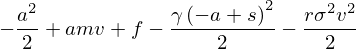

In [7]:
r = Symbol('r')
CE = E(w) - k(a) - ks(a,s) - Rational(1,2) * r * variance(w) 
CE

## 解く

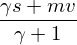

In [8]:
adag = solve(CE.diff(a), a)[0]
adag

In [9]:
Pi = E(x-w)
Pi

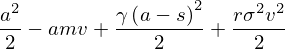

In [10]:
fdag = solve(CE, f)[0]
fdag

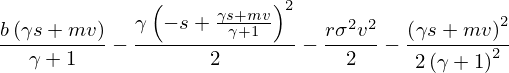

In [11]:
Pi0 = Pi.subs([(f, fdag), (a, adag)])
Pi0

In [12]:
sdag = solve(Pi0.diff(s),s)[0]
sdag

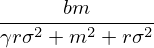

In [13]:
vdag = simplify(solve(Pi0.diff(v), v)[0])
vdag

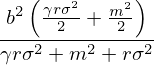

In [14]:
Pidag = simplify(Pi0.subs([(v, vdag),(s, sdag)]))
Pidag

# lemma2の設定

In [15]:
sigmae = Symbol('sigma_e', positive = True)
epse = Normal('varepsilon_e', 0, sigmae)
ye = epse
[variance(ye)]

In [16]:
rho = Symbol('rho')
cov = rho*sqrt(variance(y))*sqrt(variance(ye))
cov

In [17]:
ve = Symbol('v_e')
w2 = f + v*y + ve*ye
[w2, E(w2), variance(w2)]

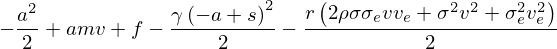

In [18]:
CE2 = E(w2) - k(a) - ks(a, s) - Rational(1, 2)*r*(variance(w2)+2*v*ve*cov)
CE2

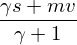

In [19]:
a2dag = solve(CE2.diff(a) ,a)[0]
a2dag

In [20]:
Pi2 = E(x-w2)
Pi2

# 解く

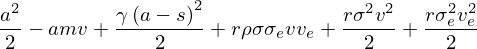

In [21]:
f2dag = solve(CE2, f)[0]
f2dag

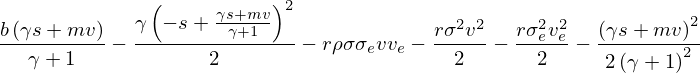

In [22]:
Pi20 = Pi.subs([(f,f2dag),(a,a2dag)])
Pi20

In [23]:
sdag2 = solve(Pi20.diff(s),s)[0]
sdag2

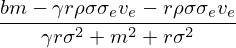

In [24]:
v2dag = simplify(solve(Pi20.diff(v),v)[0])
v2dag

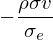

In [25]:
vedag = simplify(solve(Pi20.diff(ve), ve)[0])
vedag

In [26]:
eq1 = Eq(v2dag, v)
eq2 = Eq(vedag, ve)

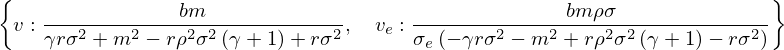

In [27]:
vdag2s = solve([eq1, eq2], [v, ve])
vdag2s

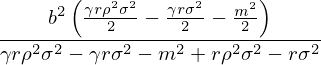

In [28]:
Pi2dag = simplify(Pi20.subs([(v, vdag2s[v]), (ve, vdag2s[ve]), (s, sdag2)]))
Pi2dag

# lemma3の設定

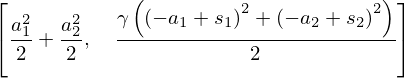

In [29]:
a1 = Symbol('a_1')
a2 = Symbol('a_2')
s1 = Symbol('s_1')
s2 = Symbol('s_2')
k2 = Lambda([a1, a2], Rational(1, 2) * (a1 ** 2 + a2 ** 2))
ks2 = Lambda([a1, a2, s1, s2], Rational(1, 2)*gamma*((s1 - a1)**2 + (s2 - a2)**2))

[k2(a1, a2), ks2(a1, a2, s1, s2)]

In [30]:
m1 = Symbol('m_1')
m2 = Symbol('m_2')
y2 = m1*a1 + m2*a2 +eps
b1 = Symbol('b_1')
b2 = Symbol('b_2')
x2 = b1*a1 + b2*a2

[y2, E(y2), x2]

In [31]:
r

In [32]:
w3 = f + v*y2
[w3, E(w3)]

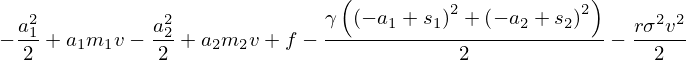

In [33]:
CE3 = E(w3) - k2(a1, a2) - ks2(a1, a2, s1, s2) - Rational(1,2)*r*(v**2*sigma**2)
CE3

# 解く

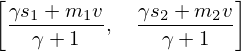

In [34]:
a1dag3 = solve(CE3.diff(a1), a1)[0]
a2dag3 = solve(CE3.diff(a2), a2)[0]
[a1dag3, a2dag3]

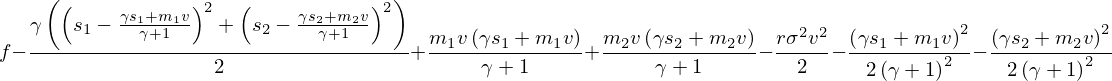

In [35]:
CE3dag = CE3.subs([(a1, a1dag3), (a2, a2dag3)])
CE3dag

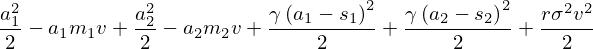

In [36]:
f3dag = solve(CE3, f)[0]
f3dag

In [37]:
Pi3 = E(x2 - w3)
Pi3

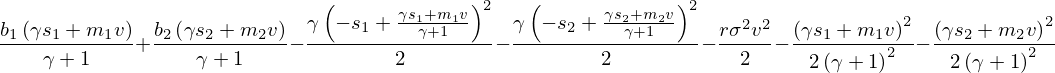

In [38]:
Pi30 = Pi3.subs([(f, f3dag), (a1, a1dag3), (a2, a2dag3)])
Pi30

In [39]:
s1dag3 = solve(Pi30.diff(s1), s1)[0]
s2dag3 = solve(Pi30.diff(s2), s2)[0]
[s1dag3, s2dag3]

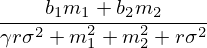

In [40]:
vdag3 = simplify(solve(Pi30.diff(v), v)[0])
vdag3

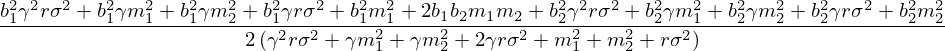

In [41]:
Pidag3 = simplify(Pi30.subs([(v, vdag3), (s1, s1dag3), (s2, s2dag3)]))
Pidag3

# lemma4の設定

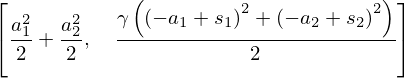

In [42]:
# k2 = Lambda([a1, a2], Rational(1, 2) * (a1 ** 2 + a2 ** 2))
# ks2 = Lambda([a1, a2, s1, s2], Rational(1, 2)*gamma*((s1 - a1)**2 + (s2 - a2)**2))

[k2(a1, a2), ks2(a1, a2, s1, s2)]

In [43]:
# y2 = m1*a1 + m2*a2 +eps

ma = Symbol('m_a')
sigmaa = Symbol('sigma_a', positive = True)
epsa = Normal('varepsilon_a', 0, sigmae)
ya = ma*a1 + epsa

# x2 = b1*a1 + b2*a2

[ya, E(ya), x2, covariance(eps, epsa)]

In [44]:
va = Symbol('v_a')
w4 = f + v*y2 + va*ya
[w4, E(w4)]

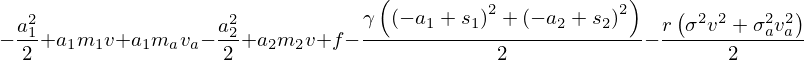

In [45]:
CE4 = E(w4) - k2(a1, a2) - ks2(a1, a2, s1, s2) - Rational(1,2)*r*(v**2*sigma**2 + va**2*sigmaa**2)
CE4

# 解く

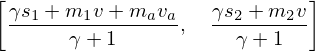

In [46]:
a1dag4 = solve(CE4.diff(a1), a1)[0]
a2dag4 = solve(CE4.diff(a2), a2)[0]
[a1dag4, a2dag4]

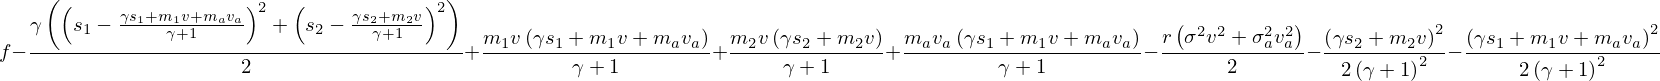

In [47]:
CE4dag = CE4.subs([(a1, a1dag4), (a2, a2dag4)])
CE4dag

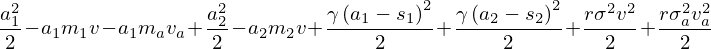

In [48]:
f4dag = solve(CE4, f)[0]
f4dag

In [49]:
Pi4 = E(x2 - w4)
Pi4

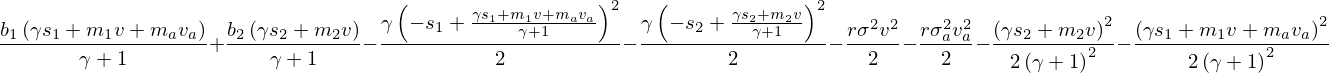

In [50]:
Pi40 = Pi4.subs([(f, f4dag), (a1, a1dag4), (a2, a2dag4)])
Pi40

In [51]:
s1dag4 = solve(Pi40.diff(s1), s1)[0]
s2dag4 = solve(Pi40.diff(s2), s2)[0]
[s1dag4, s2dag4]

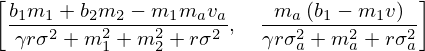

In [52]:
vdag4 = simplify(solve(Pi40.diff(v), v)[0])
vadag4 = simplify(solve(Pi40.diff(va), va)[0])
[vdag4, vadag4]

In [53]:
eq41 = Eq(vdag4, v)
eq42 = Eq(vadag4, va)

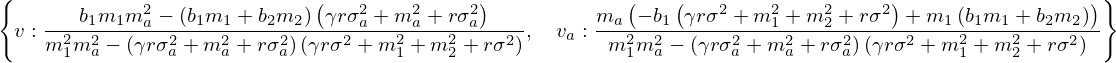

In [54]:
vdag4s = solve([eq41, eq42], [v, va])
vdag4s

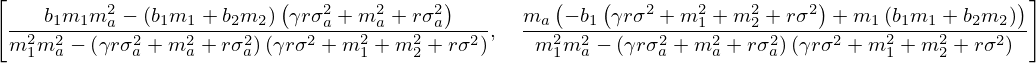

In [55]:
[vdag4s[v], vdag4s[va]]

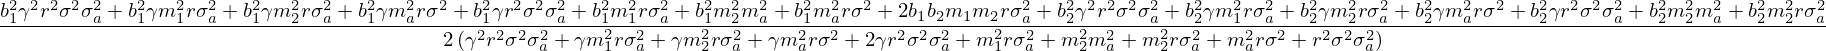

In [56]:
Pidag4 = simplify(Pi40.subs([(v, vdag4s[v]),(va, vdag4s[va]), (s1, s1dag4), (s2, s2dag4)]))
Pidag4

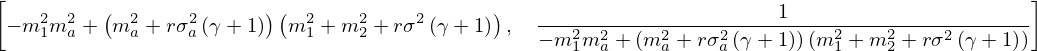

In [57]:
D = (m1**2 + m2**2 + r*(1 + gamma)*sigma**2)*(ma**2 + r*(1 + gamma)*sigmaa**2) - m1**2*ma**2
D1 = D**-1
[D, D1]

In [58]:
print('アハン？')
# D1でくくりたい

アハン？
